In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = "youtube_comments_climate_change/cleaned_data.csv"
data = pd.read_csv(path, sep=",", encoding='utf-8')

list(data.columns)

['Unnamed: 0', 'publishedAt', 'authorName', 'text', 'isReply', 'cleaned']

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(hub_url)
embeddings = embed(data['cleaned'])

print(embeddings)
print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

tf.Tensor(
[[ 0.02267956 -0.06716511  0.01718922 ... -0.0158857  -0.043926
  -0.00393031]
 [ 0.04192     0.07056528  0.09499479 ... -0.03520851 -0.0134883
   0.04670066]
 [-0.06692986 -0.00541758 -0.03079402 ...  0.02694076 -0.01263959
  -0.07979716]
 ...
 [-0.01887087  0.06309654  0.10515169 ... -0.01325583 -0.04266983
   0.01906748]
 [ 0.01090654 -0.08720968 -0.00068635 ...  0.00569523 -0.01905336
  -0.04718436]
 [ 0.0252452  -0.01673799 -0.06606336 ... -0.00096804 -0.04874957
  -0.04058736]], shape=(25914, 512), dtype=float32)
The embeddings vector is of fixed length 512


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity

cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

NameError: name 'embeddings' is not defined

### PCA

#### Choosing dimensions by looking at cumulative explained variance ration

In [6]:
X_embed = [np.array(emb) for emb in embeddings]
X = np.array([emb for emb in X_embed])

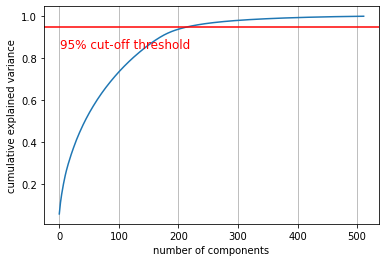

In [7]:
import matplotlib.pyplot as plt

pca_cev = PCA().fit(X)
plt.plot(np.cumsum(pca_cev.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(axis='x')

In [8]:
SUBSPACE_DIM = 200

pca = PCA(n_components= SUBSPACE_DIM)
X_new = pca.fit_transform(X)

X_list = [list(X_new[i]) for i in range(X_new.shape[0])]

print("Dimensions of embeddings matrix after PCA: ({}, {})".format(X_new.shape[0], X_new.shape[1]))

Dimensions of embeddings matrix after PCA: (25914, 200)


In [15]:
print(pca.get_precision())

[[3864.858     129.01105    42.02641  ...  -73.81415   -41.748337
  -181.80408 ]
 [ 129.01105  3815.1836     30.550047 ...  -31.129725  -87.092926
   -21.680368]
 [  42.026382   30.550045 3569.6055   ...   71.40777    36.40134
  -165.77373 ]
 ...
 [ -73.81413   -31.129784   71.40777  ... 3819.178    -115.66477
   114.75978 ]
 [ -41.74827   -87.09289    36.401268 ... -115.664696 3409.148
    -8.523717]
 [-181.80406   -21.680403 -165.77377  ...  114.75984    -8.523844
  4037.0527  ]]


In [21]:
print(pca.components_[0].size)
print(pca.components_[0])

512
[-7.80603103e-03 -3.86379622e-02 -4.07916717e-02  9.97944921e-03
 -5.54416776e-02  4.31772247e-02  3.81156318e-02  1.19013805e-02
  3.50685418e-02 -2.66028754e-03 -3.36913578e-02 -9.09148064e-03
  2.01296881e-02  7.23345531e-03  1.52603723e-02 -5.28726280e-02
  9.84283909e-03  3.33560328e-03 -1.35115078e-02  1.26073519e-02
 -4.38196436e-02 -3.13039646e-02 -3.49252857e-02  9.19815451e-02
  4.15118262e-02 -3.16336122e-03  4.07488234e-02 -1.08589502e-02
  2.71074455e-02 -2.41882354e-02 -6.12753369e-02 -4.89025973e-02
 -3.07106762e-03 -2.55321190e-02  4.99618845e-03  3.90415676e-02
 -1.65431574e-02  2.69792117e-02  1.19269756e-03 -5.08630648e-02
 -1.21297333e-02 -1.11361546e-02 -3.51435728e-02 -3.23922932e-02
 -7.85097405e-02  2.94865910e-02  6.08211569e-02 -1.23080853e-02
  2.43921559e-02 -7.43153095e-02 -3.60873938e-02  2.61375997e-02
  2.32341699e-02  1.63052790e-02  3.89848538e-02 -2.16268618e-02
 -6.34685457e-02  2.22041346e-02  3.39773558e-02  2.13917419e-02
  3.35350223e-02 -4.3

In [28]:
print(pca.explained_variance_ratio_)

[0.05649254 0.02976543 0.02458119 0.02049035 0.01916107 0.01721817
 0.0166051  0.01494635 0.01434662 0.01374328 0.01309334 0.01254196
 0.01110593 0.01063842 0.01035086 0.00992579 0.00946597 0.009389
 0.00909301 0.00891946 0.00862179 0.00851741 0.00822447 0.00801106
 0.00790271 0.00781113 0.00771145 0.00760477 0.00744111 0.00739886
 0.00702237 0.00693141 0.0067448  0.0066141  0.00648514 0.0063821
 0.00634921 0.00630814 0.00612338 0.00607331 0.00597849 0.0058707
 0.00581289 0.00559014 0.00556882 0.00555053 0.00544415 0.00539726
 0.00532994 0.00519619 0.00515041 0.00509427 0.00497236 0.00494461
 0.00488106 0.00475461 0.00474792 0.00470281 0.00465437 0.00464188
 0.0045709  0.00451138 0.00445981 0.00441153 0.00438716 0.00428854
 0.00427003 0.00422867 0.00418902 0.00414073 0.00409129 0.00402955
 0.00398755 0.00397945 0.00397465 0.00385937 0.00384701 0.00379625
 0.00375974 0.00371779 0.0036911  0.00364009 0.00362353 0.00359877
 0.00357679 0.00353323 0.00349186 0.00347785 0.00343733 0.00342382

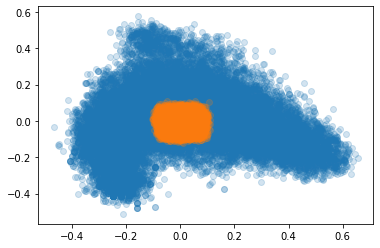

In [9]:
# plot data after pca
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

### Evaluating an optimal number of clusters

#### Silhouette Score

A Silhouette Score ranges between -1 to 1. A high score means that comments are well matched to their own cluster and poorly matched to their neighborhood clusters. 

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = [8, 14, 16, 18, 20]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_new)
    
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print("For n_clusters = {} The average silhouette_score is: {}".format(n_clusters, silhouette_avg))
    
    samples_silhouette_values = silhouette_samples(X_new, cluster_labels)

For n_clusters = 8 The average silhouette_score is: 0.03282648324966431
For n_clusters = 14 The average silhouette_score is: 0.035575658082962036
For n_clusters = 16 The average silhouette_score is: 0.0364159531891346
For n_clusters = 18 The average silhouette_score is: 0.03698687255382538
For n_clusters = 20 The average silhouette_score is: 0.03207258880138397


#### Elbow Method

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_normalized = sc.fit_transform(X_new)

In [17]:
from sklearn.metrics import davies_bouldin_score
from tqdm.notebook import tqdm

sse, db, slc = {}, {}, {}
for k in tqdm(range(8, 20)):
    kmeans = KMeans(n_clusters = k, max_iter=1000, random_state=10).fit(X_normalized)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(X_normalized, clusters)
    slc[k] = silhouette_score(X_normalized, clusters)

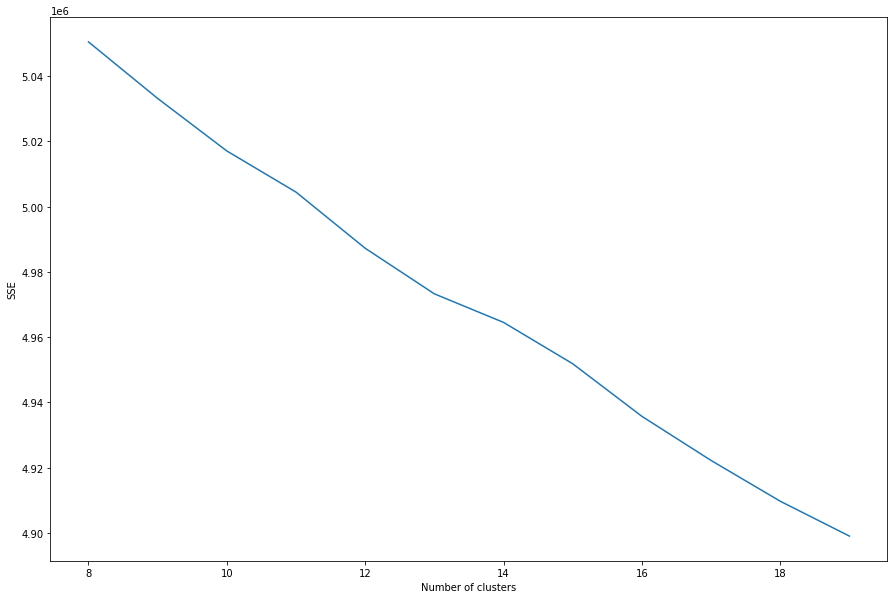

In [20]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

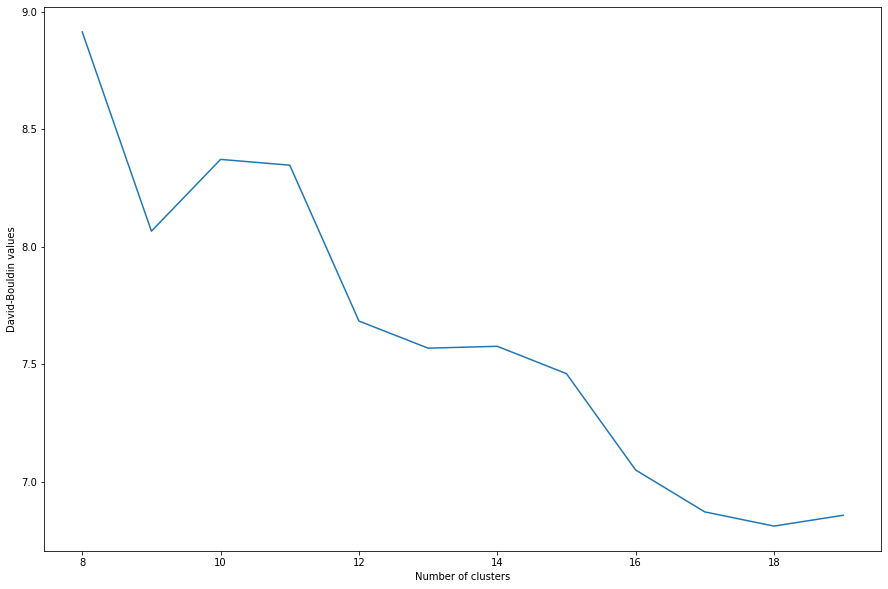

In [22]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of clusters")
plt.ylabel("David-Bouldin values")
plt.show()

### Clustering with DBSCAN

TODO: takes forevvvverrr

DBSCAN Parameter:
- eps: Max distance between two samples for them to be considered as in a neigborhood, default=0.5
- min_samples: Number of samples in a neighborhood for a point to be considered a core point, default = 5
- metric: Metric for calculating distance between instances in a feature array TODO: Find out more
- n_jobs: Used for parallelization, None means 1, -1 means using all processors

In [13]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.9, min_samples=10).fit(X_new)

In [9]:
db

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [14]:
components = db.components_
labels = db.labels_
core_sample_indices = db.core_sample_indices_

In [15]:
labels
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

From docs: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [16]:
frequencies

array([[   -1,  9726],
       [    0, 15994],
       [    1,    14],
       [    2,    16],
       [    3,    26],
       [    4,    10],
       [    5,    13],
       [    6,    11],
       [    7,    15],
       [    8,    14],
       [    9,    15],
       [   10,    19],
       [   11,    11],
       [   12,     9],
       [   13,    10],
       [   14,    11]])